### Performing KNN analysis on the Kickstarter data ###

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas_profiling

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import svm, ensemble, linear_model, neighbors, naive_bayes
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import roc_curve, auc

plt.style.use('ggplot')

In [16]:
kickstarter = pd.read_csv('kickstarter_04_25_19_ready_for_modeling.csv')

In [17]:
kickstarter_numeric = kickstarter.drop(columns = ['id', 'slug', 'child_category','location'])

In [18]:
X = kickstarter_numeric.drop('state_successful', axis = 1)
y = kickstarter_numeric['state_successful']

In [19]:
scaler = StandardScaler()

In [20]:
scaler.fit(kickstarter_numeric.drop('state_successful',axis=1))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [26]:
scaled_features = scaler.transform(kickstarter_numeric.drop('state_successful',axis=1))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [27]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,kickstarter_numeric['state_successful'],
                                                    test_size=0.30, random_state = 101)

In [10]:
ks = [5, 10, 20, 25, 30,35]
param_grid = [{'n_neighbors': ks}]
knn = KNeighborsClassifier(n_neighbors=5)
knn_grid = GridSearchCV(knn, param_grid, cv=8, scoring='roc_auc', verbose=1, n_jobs=-1)
knn_grid.fit(X_train, y_train)
grid_predictions = knn_grid.predict(X_test)
best_params = knn_grid.best_params_
best_estimator = knn_grid.best_estimator_
best_cm = confusion_matrix(y_test,grid_predictions)
best_cr = classification_report(y_test,grid_predictions)
print(best_params, best_estimator, best_cm, best_cr)

Fitting 8 folds for each of 6 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 72.6min finished


{'n_neighbors': 35} KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=35, p=2,
           weights='uniform') [[16914 11431]
 [ 8138 25632]]               precision    recall  f1-score   support

           0       0.68      0.60      0.63     28345
           1       0.69      0.76      0.72     33770

   micro avg       0.68      0.68      0.68     62115
   macro avg       0.68      0.68      0.68     62115
weighted avg       0.68      0.68      0.68     62115



In [19]:
#knn = KNeighborsClassifier()
#param_grid = [{'n_neighbors': list(range(24,26))}]
#grid = GridSearchCV(knn,param_grid,refit=True,verbose=4, scoring='roc_auc', cv = 5, n_jobs = -1)
#grid.fit(X_train,y_train)
#grid_predictions = grid.predict(X_test)
#best_params = grid.best_params_
#best_estimator = grid.best_estimator_
#best_cm = confusion_matrix(y_test,grid_predictions)
#best_cr = classification_report(y_test,grid_predictions)
#print(best_params, best_estimator, best_cm, best_cr)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] n_neighbors=24 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... n_neighbors=24, score=0.7542461308338198, total= 1.1min
[CV] n_neighbors=24 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.1min remaining:    0.0s


[CV] ......... n_neighbors=24, score=0.7546411352950121, total=  52.2s
[CV] n_neighbors=24 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  9.0min remaining:    0.0s


[CV] ......... n_neighbors=24, score=0.7561333741044011, total= 1.1min
[CV] n_neighbors=24 ..................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 13.9min remaining:    0.0s


[CV] ......... n_neighbors=24, score=0.7575519250073043, total=  55.6s
[CV] n_neighbors=24 ..................................................
[CV] ......... n_neighbors=24, score=0.7474287281826297, total=  51.3s
[CV] n_neighbors=25 ..................................................
[CV] ......... n_neighbors=25, score=0.7541927278273894, total= 1.0min
[CV] n_neighbors=25 ..................................................
[CV] ......... n_neighbors=25, score=0.7550050175536506, total=  47.9s
[CV] n_neighbors=25 ..................................................
[CV] ......... n_neighbors=25, score=0.7567518311399236, total= 1.0min
[CV] n_neighbors=25 ..................................................
[CV] ......... n_neighbors=25, score=0.7572033223148901, total=  52.6s
[CV] n_neighbors=25 ..................................................
[CV] ......... n_neighbors=25, score=0.7479259204802873, total=  49.7s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 42.9min finished


{'n_neighbors': 25} KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=25, p=2,
           weights='uniform') [[17093 11252]
 [ 8172 25598]]               precision    recall  f1-score   support

           0       0.68      0.60      0.64     28345
           1       0.69      0.76      0.72     33770

   micro avg       0.69      0.69      0.69     62115
   macro avg       0.69      0.68      0.68     62115
weighted avg       0.69      0.69      0.69     62115



In [30]:
knn_25 = KNeighborsClassifier(n_neighbors = 25)
knn_25.fit(X_train, y_train)
predictions = knn_25.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))

[[17093 11252]
 [ 8172 25598]]
              precision    recall  f1-score   support

           0       0.68      0.60      0.64     28345
           1       0.69      0.76      0.72     33770

   micro avg       0.69      0.69      0.69     62115
   macro avg       0.69      0.68      0.68     62115
weighted avg       0.69      0.69      0.69     62115



0.7512073241140809


No handles with labels found to put in legend.


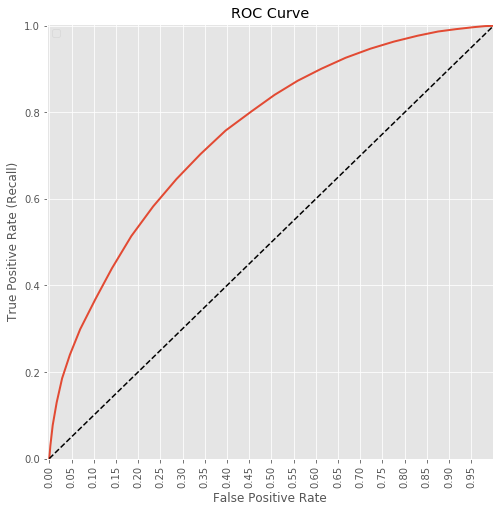

In [39]:
y_scores = knn_25.predict_proba(X_test)[:, 1]
roc_auc = auc(fpr, tpr)
fpr, tpr, auc_thresholds = roc_curve(y_test, y_scores)
print(auc(fpr, tpr)) # AUC of ROC
plt.figure(figsize=(8,8))
plt.title('ROC Curve')
plt.plot(fpr, tpr, linewidth=2,)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.005, 1, 0, 1.005])
plt.xticks(np.arange(0,1, 0.05), rotation=90)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.legend(loc='best')